In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("./facial-keypoints-detection/training.csv")
test = pd.read_csv("./facial-keypoints-detection/test.csv")

In [3]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [5]:
train = train.dropna()

In [6]:
train.shape, type(train)

((2140, 31), pandas.core.frame.DataFrame)

In [7]:
train['Image'] = train['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [8]:
train['Image'][0].shape

(96, 96)

In [9]:
import matplotlib.pyplot as plt

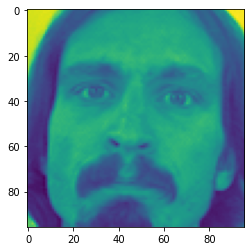

In [10]:
plt.imshow(train['Image'][0])

In [11]:
def detection(face,points):
    plt.imshow(face)
    for i in range(0,30,2):
        plt.scatter(points[i],points[i+1],color='red')

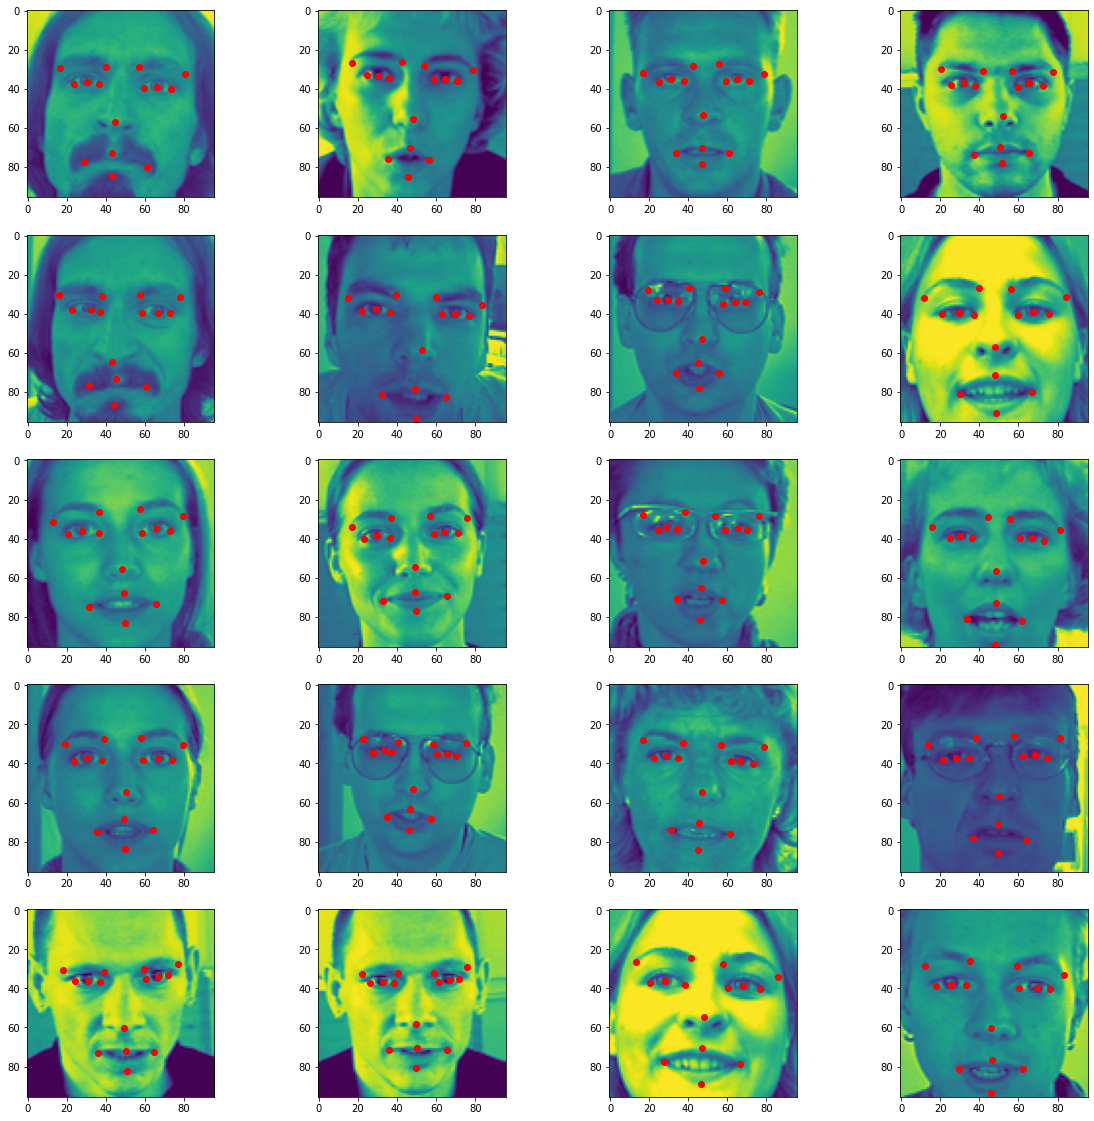

In [12]:
fig = plt.figure(figsize=(20,20))
for i in range(20):
    ax = fig.add_subplot(5,4,i+1)
    detection(train['Image'][i],train.iloc[i])

In [13]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [14]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [15]:
test.shape

(1783, 2)

In [16]:
train.shape

(2140, 31)

In [17]:
train['Image'][0].dtype

dtype('int64')

In [18]:
train['Image'][0].shape

(96, 96)

In [19]:
img = train['Image']

In [20]:
img.shape

(2140,)

In [21]:
len(img),img[0].shape

(2140, (96, 96))

In [22]:
img = np.array(img)

In [23]:
img1 = []
for i in img:
    img1.append(i)

In [24]:
img1 = np.array(img1)

In [25]:
img = []

In [26]:
for i in range(len(img1)):
    a = []
    a.append(img1[i])
    a = np.array(a)
    a = a.reshape((96,96,1))
    img.append(a)

In [27]:
img = np.array(img)

In [28]:
img.shape

(2140, 96, 96, 1)

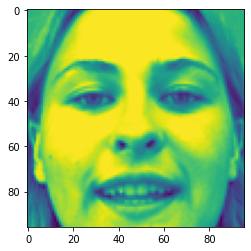

In [29]:
plt.imshow(img[7])

In [30]:
train = train.drop('Image', axis=1)
y = []
for i in range(0,train.shape[0]):
    points = train.iloc[i,:]
    y.append(points)
y = np.array(y,dtype='float')

In [31]:
y.shape

(2140, 30)

In [32]:
y[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_rest, y_train, y_rest = train_test_split(img, y, test_size=0.2, random_state=42)

In [34]:
x_test, x_val, y_test, y_val = train_test_split(x_rest, y_rest, test_size=0.5, random_state=42)

In [35]:
x_train.shape,x_test.shape,x_val.shape

((1712, 96, 96, 1), (214, 96, 96, 1), (214, 96, 96, 1))

In [36]:
y_train.shape,y_test.shape,y_val.shape

((1712, 30), (214, 30), (214, 30))

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D
from keras import regularizers
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [38]:
from tensorflow import keras

In [39]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0

In [40]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [41]:
history=model.fit(x_train,y_train,epochs = 50,batch_size = 64,validation_data=(x_val,y_val))

Epoch 1/50
27/27 [==============================] - 165s 5s/step - loss: 753.1202 - mae: 19.4879 - val_loss: 386.0727 - val_mae: 18.0628
Epoch 2/50
27/27 [==============================] - 107s 4s/step - loss: 31.3163 - mae: 4.4080 - val_loss: 78.0217 - val_mae: 7.6976
Epoch 3/50
27/27 [==============================] - 104s 4s/step - loss: 24.8161 - mae: 3.9239 - val_loss: 69.6588 - val_mae: 7.3866
Epoch 4/50
27/27 [==============================] - 104s 4s/step - loss: 22.8100 - mae: 3.7483 - val_loss: 53.7002 - val_mae: 6.3857
Epoch 5/50
27/27 [==============================] - 104s 4s/step - loss: 21.2488 - mae: 3.6263 - val_loss: 46.6884 - val_mae: 5.8894
Epoch 6/50
27/27 [==============================] - 105s 4s/step - loss: 18.8031 - mae: 3.4091 - val_loss: 32.1917 - val_mae: 4.8655
Epoch 7/50
27/27 [==============================] - 104s 4s/step - loss: 17.2978 - mae: 3.2598 - val_loss: 23.5813 - val_mae: 4.1456
Epoch 8/50
27/27 [==============================] - 98s 4s/step -

In [42]:
model.save('model.h5')

In [43]:
test

,ImageId,Image
0,1,"[[182, 183, 182, 182, 180, 180, 176, 169, 156,..."
1,2,"[[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, ..."
2,3,"[[177, 176, 174, 170, 169, 169, 168, 166, 166,..."
3,4,"[[176, 174, 174, 175, 174, 174, 176, 176, 175,..."
4,5,"[[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, ..."
...,...,...
1778,1779,"[[101, 101, 101, 100, 100, 97, 97, 98, 102, 14..."
1779,1780,"[[201, 191, 171, 158, 145, 140, 136, 130, 123,..."
1780,1781,"[[28, 28, 29, 30, 31, 32, 33, 34, 39, 44, 46, ..."
1781,1782,"[[104, 95, 71, 57, 46, 52, 65, 70, 70, 67, 76,..."


In [56]:
test.head()

,ImageId,Image
0,1,"[[182, 183, 182, 182, 180, 180, 176, 169, 156,..."
1,2,"[[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, ..."
2,3,"[[177, 176, 174, 170, 169, 169, 168, 166, 166,..."
3,4,"[[176, 174, 174, 175, 174, 174, 176, 176, 175,..."
4,5,"[[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, ..."


In [59]:
test['Image'].shape

(1783,)

In [60]:
timag = []
for i in range(0,1783):
    timag.append(test['Image'][i])

In [62]:
timag = np.array(timag)

In [63]:
timag.shape

(1783, 96, 96)

In [67]:
test_images = []
for i in range(0,1783):
    a=[]
    a.append(timag[i])
    a = np.array(a)
    a = a.reshape((96,96,1))
    test_images.append(a)

In [68]:
test_images = np.array(test_images)

In [69]:
test_images.shape

(1783, 96, 96, 1)

In [72]:
pred = model.predict(test_images)

In [74]:
pred.shape

(1783, 30)

In [ ]:
def detection(face,points):
    plt.imshow(face)
    for i in range(0,30,2):
        plt.scatter(points[i],points[i+1],color='red')

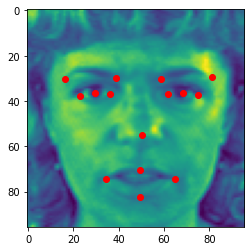

In [188]:
detection(test['Image'][7],pred[7])

### Random photos

In [121]:
import cv2
import matplotlib.pyplot as plt

In [134]:
cap = cv2.VideoCapture(0)

In [136]:
while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    k = cv2.waitKey(1)
    if  k == ord('q'):
        break
    if  k == ord('s'):
        cv2.imwrite('photo.png',frame)
        break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [175]:
photo = cv2.imread('photo.png' , cv2.IMREAD_GRAYSCALE)

In [176]:
photo.shape

(282, 278)

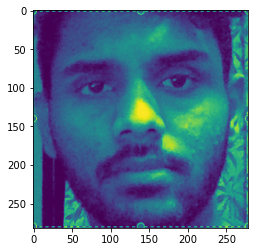

In [177]:
plt.imshow(photo)

In [178]:
photo1 = cv2.resize(photo, (96,96))

In [179]:
photo1.shape

(96, 96)

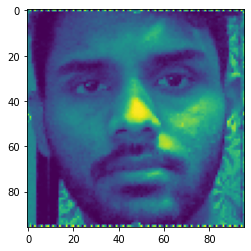

In [180]:
plt.imshow(photo1)

In [181]:
photo1 = np.resize(photo1,(96,96,1))

In [182]:
photo1.shape

(96, 96, 1)

In [183]:
a = []
a.append(photo1)
a = np.array(a)
a.shape

(1, 96, 96, 1)

In [184]:
pred1 = model.predict(a)

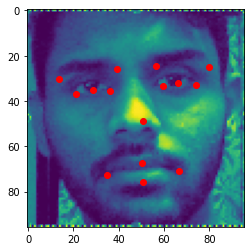

In [185]:
detection(photo1,pred1[0])